# Data Dictionary
There are multiple variables in the dataset which can be cleanly divided in 3 categories:

Demographic information about customers
**customer_id** - Customer id

**vintage** - Vintage of the customer with the bank in number of days

**age** - Age of customer

**gender** - Gender of customer

**dependents** - Number of dependents

**occupation** - Occupation of the customer

**city** - City of customer (anonymised)

Customer Bank Relationship
**customer_nw_category** - Net worth of customer (3:Low 2:Medium 1:High)

**branch_code** - Branch Code for customer account

**days_since_last_transaction** - No of Days Since Last Credit in Last 1 year

Transactional Information
**current_balance** - Balance as of today

**previous_month_end_balance** - End of Month Balance of previous month

**average_monthly_balance_prevQ** - Average monthly balances (AMB) in Previous Quarter

**average_monthly_balance_prevQ2** - Average monthly balances (AMB) in previous to previous quarter

**current_month_credit** - Total Credit Amount current month

**previous_month_credit** - Total Credit Amount previous month

**current_month_debit** - Total Debit Amount current month

**previous_month_debit** - Total Debit Amount previous month

**current_month_balance** - Average Balance of current month

**previous_month_balance** - Average Balance of previous month

**churn** - Average balance of customer falls below minimum balance in the next quarter (1/0)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:

import math
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
data=pd.read_csv('/content/drive/My Drive/data.csv')

In [0]:
data.shape[0]

28382

In [0]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [0]:
data.isnull().sum() #find missing values

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [0]:
data['customer_nw_category'] = data['customer_nw_category'].astype('str')


In [0]:
#filling missing values 
data['occupation'].fillna(value=(data['occupation'].mode()[0]),inplace=True)
data['gender'].fillna(value=(data['gender'].mode()[0]),inplace=True)
data['days_since_last_transaction'].fillna(value=(math.floor(data['days_since_last_transaction'].mean())),inplace=True)
data['city'].fillna(value=(data['city'].mode()[0]),inplace=True)
data['dependents'].fillna(value=(data['dependents'].mode()[0]),inplace=True)

In [0]:
data.describe()

,customer_id,vintage,age,dependents,city,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.317102,802.444014,925.975019,69.884504,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.958386,428.316238,937.799129,81.291488,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,176.000000,13.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,879.000000,572.000000,41.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,1440.000000,83.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [0]:
data=pd.get_dummies(data) #one hot encoding

In [0]:
data.head()

,customer_id,vintage,age,dependents,city,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,customer_nw_category_1,customer_nw_category_2,customer_nw_category_3
0,1,3135,66,0.0,187.0,755,224.0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,0,1,0,0,0,1,0,0,1,0
1,2,310,35,0.0,1020.0,3214,60.0,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,0,1,0,0,0,1,0,0,1,0
2,4,2356,31,0.0,146.0,41,69.0,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,0,1,0,0,1,0,0,0,1,0
3,5,478,90,0.0,1020.0,582,147.0,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,0,1,0,0,0,1,0,0,1,0
4,6,2531,42,2.0,1494.0,388,58.0,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,0,1,0,0,0,1,0,0,0,1


In [0]:
#scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_data = pd.DataFrame(scaled_data, columns=data.columns)
scaled_data.head()

,customer_id,vintage,age,dependents,city,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,gender_Female,gender_Male,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student,customer_nw_category_1,customer_nw_category_2,customer_nw_category_3
0,0.000000,0.232330,0.730337,0.000000,0.113402,0.157708,0.613699,0.001178,0.000802,0.000005,0.003572,1.548512e-08,8.044683e-08,2.487609e-08,1.343546e-07,0.000836,0.001158,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.000033,0.010221,0.382022,0.000000,0.618557,0.672035,0.164384,0.001843,0.002064,0.001118,0.005754,4.482534e-08,2.328724e-07,7.182983e-04,7.110188e-05,0.001707,0.002438,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.000099,0.171083,0.337079,0.000000,0.088539,0.008366,0.189041,0.001593,0.001561,0.000611,0.003844,4.890037e-08,2.540426e-07,7.916775e-04,1.833021e-04,0.001450,0.001789,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.000132,0.023430,1.000000,0.000000,0.618557,0.121523,0.402740,0.001319,0.000947,0.000115,0.003484,3.749028e-08,1.947660e-07,6.022631e-08,1.515605e-03,0.000980,0.001195,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.000165,0.184842,0.460674,0.038462,0.906004,0.080945,0.158904,0.001088,0.000792,0.000038,0.003656,2.608020e-08,3.025648e-04,7.706481e-05,1.087601e-03,0.000784,0.001196,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [0]:
y = scaled_data['churn']
X = scaled_data.drop(['churn'], axis=1)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 101, stratify=y, test_size=0.25)

In [0]:
y_train.value_counts(normalize=True)

0.0    0.814667
1.0    0.185333
Name: churn, dtype: float64

In [0]:
y_valid.value_counts(normalize=True)

0.0    0.814684
1.0    0.185316
Name: churn, dtype: float64

In [0]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((21286, 27), (21286,), (7096, 27), (7096,))

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
dt_model = DecisionTreeClassifier(random_state=10,max_depth=10,criterion='entropy')

In [0]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [0]:
dt_model.score(X_train, y_train)

0.8994174574837922

In [0]:
dt_model.score(X_valid, y_valid)

0.8487880496054115

In [0]:
#to get the max_depth value which gives max accuracy
train_accuracy = []
validation_accuracy = []
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10,criterion='entropy')
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_valid, y_valid))

In [0]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.841163,0.840474
1,2,0.841163,0.840474
2,3,0.852673,0.853579
3,4,0.856431,0.853157
4,5,0.862210,0.858935


No handles with labels found to put in legend.


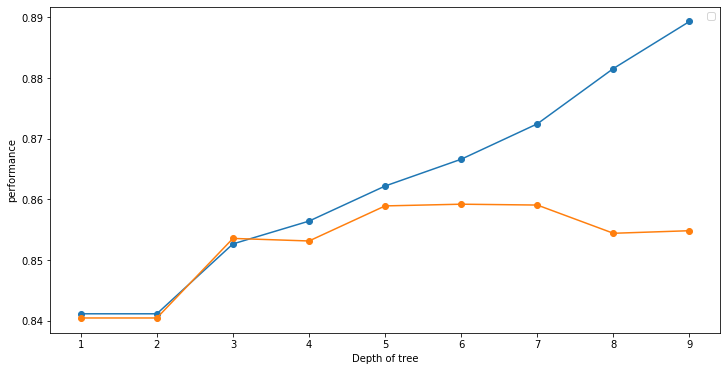

In [0]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

In [0]:
dt_model = DecisionTreeClassifier(random_state=10,max_depth=7,criterion='entropy',max)

In [0]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [0]:
dt_model.score(X_train,y_train)

0.8724513764915908

In [0]:
dt_model.score(X_valid,y_valid)

0.859075535512965

In [0]:
from sklearn.ensemble import RandomForestClassifier #prediction using random forest

In [0]:
clf = RandomForestClassifier(random_state=10)

In [0]:
clf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [0]:
clf.score(X_train,y_train)

0.9846847693319553

In [0]:
clf.score(X_valid,y_valid)

0.8563979706877114

In [0]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,10):
    clf = DecisionTreeClassifier(max_depth=depth, random_state=10,criterion='gini')
    clf.fit(X_train, y_train)
    train_accuracy.append(clf.score(X_train, y_train))
    validation_accuracy.append(clf.score(X_valid, y_valid))

In [0]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.845438,0.848224
1,2,0.845438,0.848224
2,3,0.851311,0.852029
3,4,0.857277,0.856116
4,5,0.862586,0.858230


No handles with labels found to put in legend.


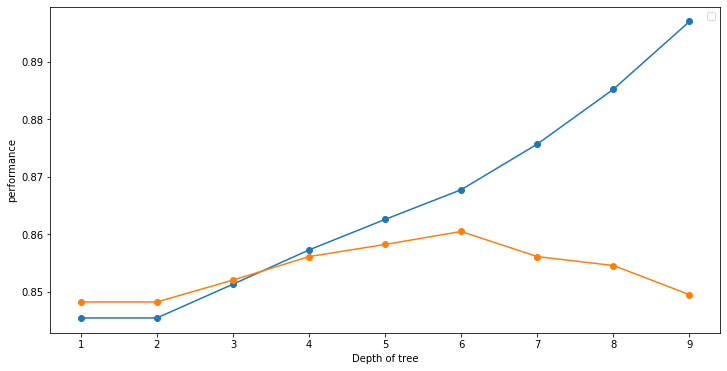

In [0]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()